# An Analaysis of Airline Passengers Satisfaction Dataset 

#### In this notebook, we aimed to explore/ explain the features of the Airline Passengers Satisfaction Dataset, also we are going to analysis it. The analysis includes data cleaning, descriptive statistics, missing and outlier value handling, and data visualization. Let's begin...

## 1. Importing Necessary Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')

## 2. First Review
### a.  First 5 Rows

In [2]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### b. Column Names

In [3]:
# column names
df.columns 

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### c. Dimensions and Data Type

In [4]:
# number of rows and columns
df.shape 
# data types and any null value?
df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## 3. Statistical Summary

In [5]:
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

stats = pd.DataFrame({
    'mean': df[numeric_cols].mean(),
    'median': df[numeric_cols].median(),
    'std': df[numeric_cols].std(),
    'min': df[numeric_cols].min(),
    'max': df[numeric_cols].max()
})
 # align center and asset the columns' width
styled_stats = stats.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},   
    {'selector': 'td', 'props': [('text-align', 'center')]},   
]).set_properties(**{
    'max-width': '100px',   
    'width': '100px',
    'min-width': '100px'
})

styled_stats



,mean,median,std,min,max
Age,39.379706,40.000000,15.114964,7.000000,85.000000
Flight Distance,1189.448375,843.000000,997.147281,31.000000,4983.000000
Departure Delay in Minutes,14.815618,0.000000,38.230901,0.000000,1592.000000
Arrival Delay in Minutes,15.178678,0.000000,38.698682,0.000000,1584.000000


In [6]:
# How many examples are there for each categorical variable and the proportion of each class (%)

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for col in categorical_cols:
    print(f"\n{col}:\n")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))



Gender:

Gender
Female    52727
Male      51177
Name: count, dtype: int64
Gender
Female    50.75%
Male      49.25%
Name: proportion, dtype: object

Customer Type:

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
Customer Type
Loyal Customer       81.73%
disloyal Customer    18.27%
Name: proportion, dtype: object

Type of Travel:

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
Type of Travel
Business travel    68.96%
Personal Travel    31.04%
Name: proportion, dtype: object

Class:

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
Class
Business    47.80%
Eco         44.99%
Eco Plus     7.21%
Name: proportion, dtype: object

satisfaction:

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64
satisfaction
neutral or dissatisfied    56.67%
satisfied                  43.33%
Name: proportion, dtype: object


## 4. Missing Value Check

In [7]:
# How many missing data are there in which columns and the percentage? (checks all columns but brings only which have missing ones)

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
missing_df


,Missing Values,Percentage (%)
Arrival Delay in Minutes,310,0.298352


#### Missing data are numerical data in the "arrival in delay" column. Also, since the rate of missing data in the relevant column is very low compared to the full data (0.298%), missing data will be filled. But keep in mind that if there were a lot of missing data in the relevant column, we might need to delete rows or even the column entirely. If the data is symmetrical and less affected by outliers, Mean is a good choice. If there are outliers or skewed distributions in the data, Median gives more accurate results because it is not affected by extreme values. We will visualise 'Arrival Delay in Minutes' to decide between mean and median.

## 5. Data Visualization of 'Arrival Delay in Minutes' to Decide Whether to Use Mean or Median

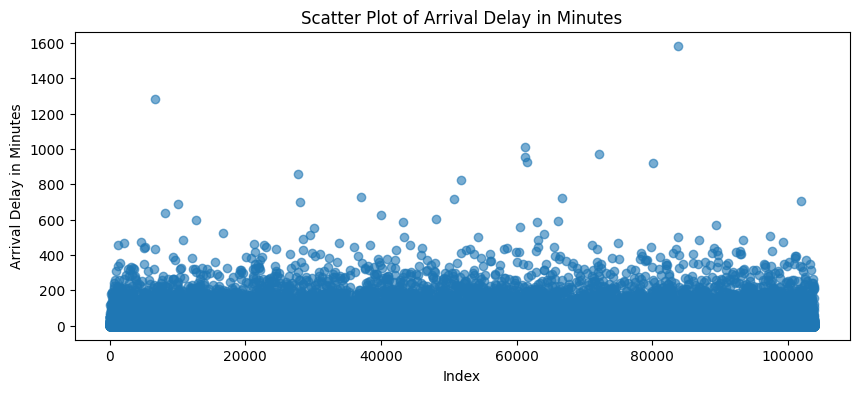

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.scatter(range(len(df)), df['Arrival Delay in Minutes'], alpha=0.6)
plt.title('Scatter Plot of Arrival Delay in Minutes')
plt.xlabel('Index')
plt.ylabel('Arrival Delay in Minutes')
plt.show()


#### According to the scatter chart, the data has many small values and a few very large values. There are quite a few outliers: some lags are over 1000 minutes. The density seems to be concentrated between 0–300 minutes. Therefore, the median will be used to fill in missing data.
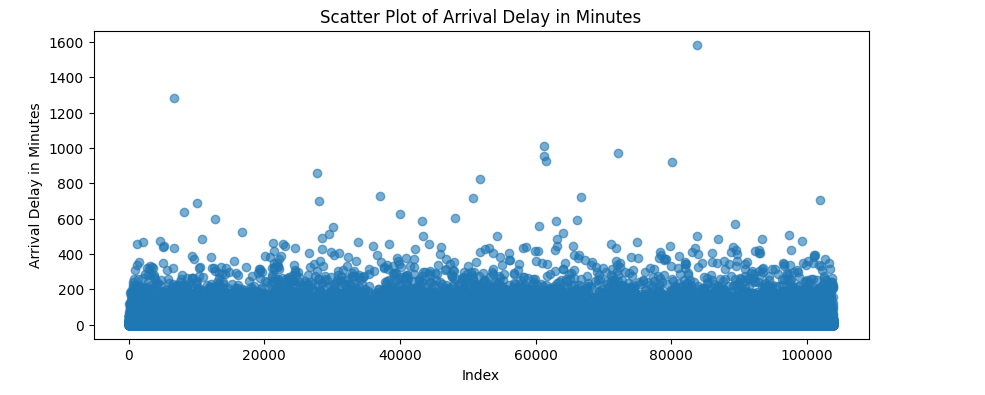

## 6. Filling the Missing Values by Median Value

In [9]:
median_value = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(median_value)


#### Let's check if we filled the missing values successfully!

In [10]:
print(df['Arrival Delay in Minutes'].isnull().sum())  # it should be zero

0


#### After all this proccess, finally we are going the check outliers for all columns. Also, visualize the data using appropriate chart types for numerical and categorical variables. 

## 7. Outlier Detection Using Interquartile Range (IQR) 

In [11]:
# define function
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# numeric columns
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# create a list
outlier_summary = []

# calculate outlier for each column
for column in numeric_columns:
    outliers = detect_outliers(df, column)
    count = len(outliers)
    percent = (count / len(df)) * 100
    outlier_summary.append({
        'Column': column,
        'Number of Outliers': count,
        'Percentage (%)': round(percent, 2)
    })

# make a table
outlier_df = pd.DataFrame(outlier_summary)

from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

styled = outlier_df.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    dict(selector='th', props=[('text-align', 'center')])
])

display(styled)


,Column,Number of Outliers,Percentage (%)
0,Age,0,0.000000
1,Flight Distance,2291,2.200000
2,Departure Delay in Minutes,14529,13.980000
3,Arrival Delay in Minutes,13954,13.430000


## 8. General Data Visualization

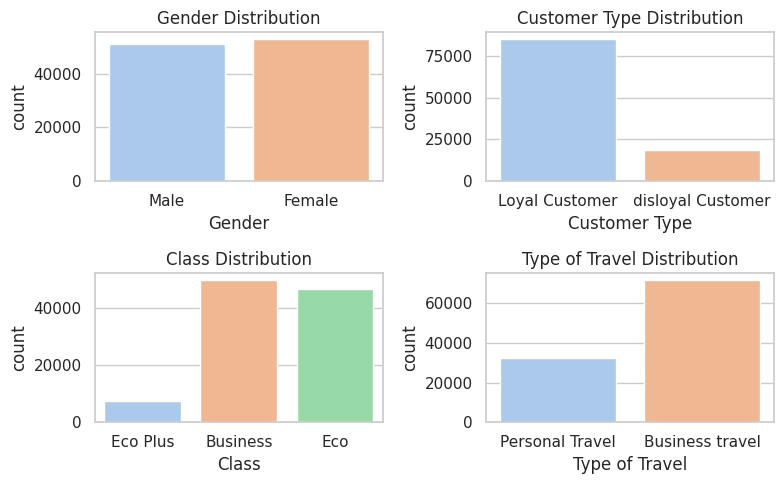

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

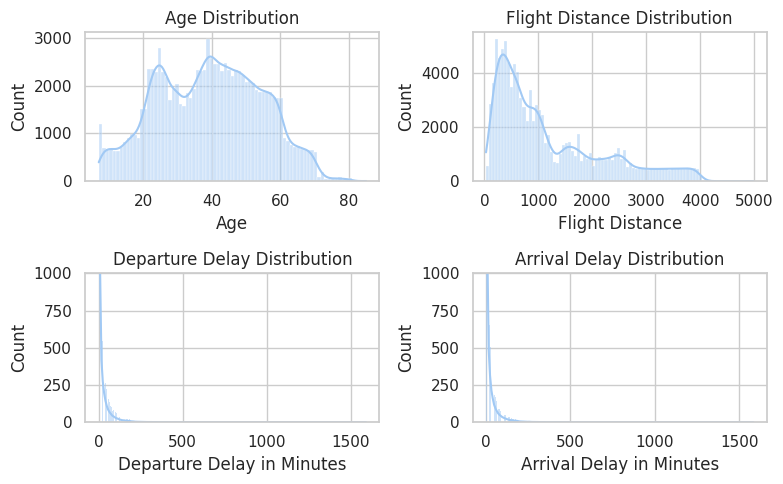

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid", palette="pastel")

# --------------------------
# Categorical Variable Distributions
# --------------------------
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Gender distribution
sns.countplot(x='Gender', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Customer Type distribution
sns.countplot(x='Customer Type', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Customer Type Distribution')

# Class distribution
sns.countplot(x='Class', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Class Distribution')

# Type of Travel distribution
sns.countplot(x='Type of Travel', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Type of Travel Distribution')

plt.tight_layout()
plt.show()

# --------------------------
# Numerical Variable Distributions
# --------------------------
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Age distribution
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Flight Distance distribution
sns.histplot(df['Flight Distance'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Flight Distance Distribution')

# Departure Delay
sns.histplot(df['Departure Delay in Minutes'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Departure Delay Distribution')
axes[1, 0].set_ylim(0, 1000)  # Set y-axis limits

# Arrival Delay
sns.histplot(df['Arrival Delay in Minutes'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Arrival Delay Distribution')
axes[1, 1].set_ylim(0, 1000)  # Set y-axis limits

plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

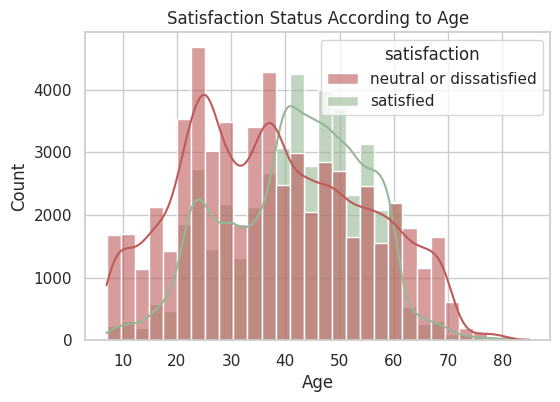

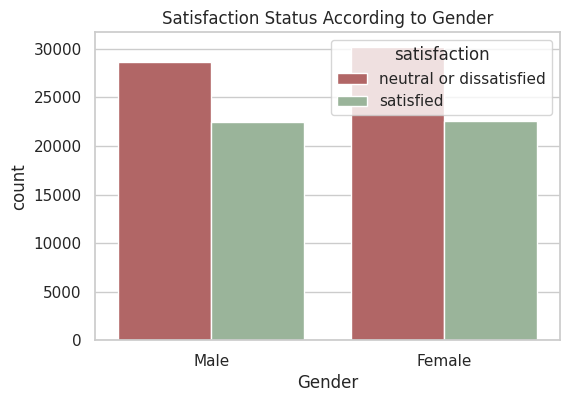

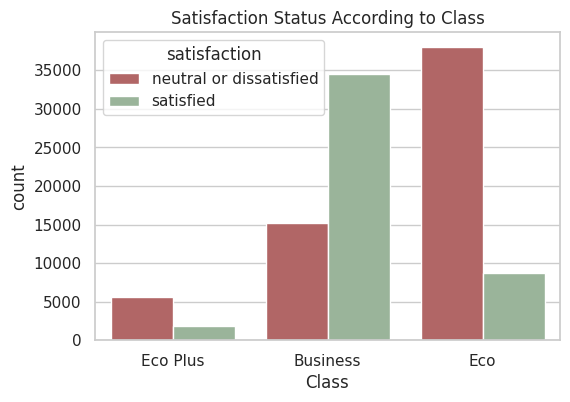

In [13]:
custom_palette = {
    "satisfied": "#96B896",     
    "neutral or dissatisfied": "#BD5A5A" 
}
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Age", hue="satisfaction", bins=30, kde=True, palette= custom_palette, alpha=0.6)
plt.title("Satisfaction Status According to Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender", hue="satisfaction", palette= custom_palette)
plt.title("Satisfaction Status According to Gender")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Class", hue="satisfaction", palette= custom_palette)
plt.title("Satisfaction Status According to Class")
plt.show()

